In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [3]:
df = pd.read_csv(r'D:\archive\Iris.csv')
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.shape

(150, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [20]:
data = df.drop_duplicates(subset = 'Species')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
100,101,6.3,3.3,6.0,2.5,Iris-virginica


In [21]:
df['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

## Data Visualization

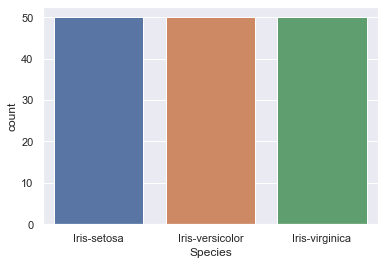

In [23]:
sns.countplot(x ='Species', data=df, )
plt.show()

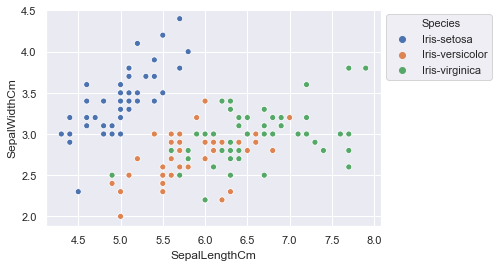

In [24]:
#compare sepal length and sepal width
sns.scatterplot(x='SepalLengthCm' , y='SepalWidthCm', hue= 'Species' , data=df, )

plt.legend(bbox_to_anchor = (1,1), loc=2)

plt.show()

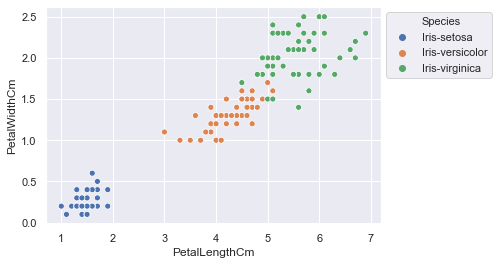

In [36]:
# Compare the petal length and petal width
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', hue='Species',data = df, )

plt.legend(bbox_to_anchor=(1,1), loc=2)

plt.show()

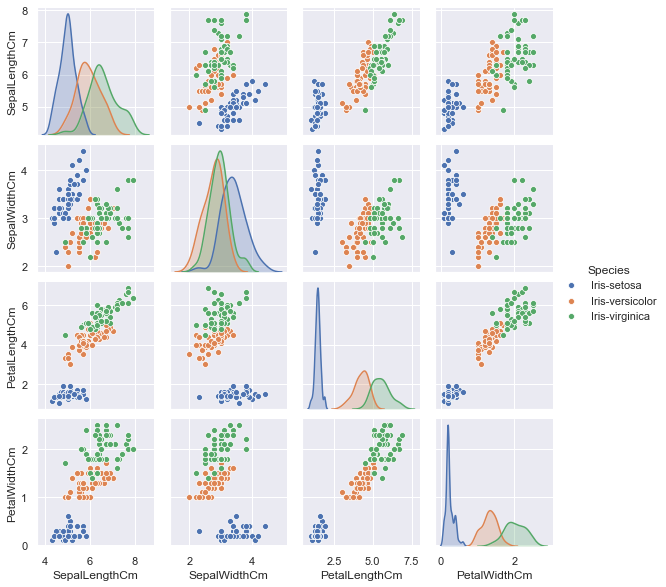

In [38]:
sns.pairplot(df.drop(['Id'], axis=1), hue='Species' , height=2)

(array([48.,  2., 15., 37., 25., 23.]),
 array([0.1, 0.5, 0.9, 1.3, 1.7, 2.1, 2.5]),
 <a list of 6 Patch objects>)

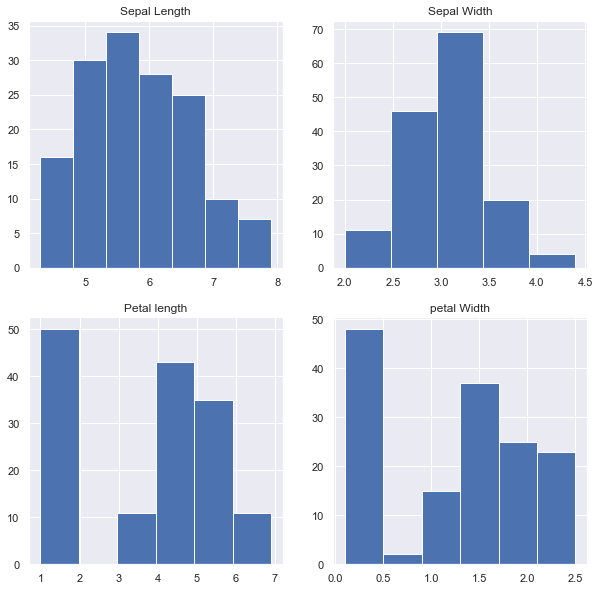

In [39]:
fig, axes = plt.subplots(2,2, figsize=(10,10))

axes[0,0].set_title('Sepal Length')
axes[0,0].hist(df['SepalLengthCm'] , bins=7)

axes[0,1].set_title('Sepal Width')
axes[0,1].hist(df['SepalWidthCm'],bins=5)

axes[1,0].set_title('Petal length')
axes[1,0].hist(df['PetalLengthCm'], bins=6)

axes[1,1].set_title('petal Width')
axes[1,1].hist(df['PetalWidthCm'], bins=6)


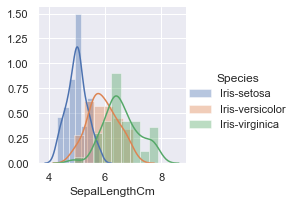

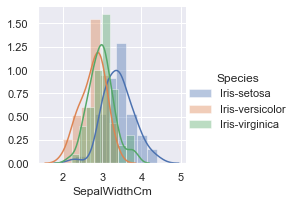

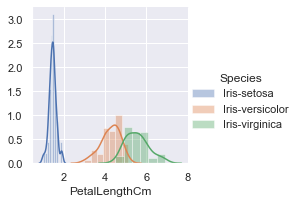

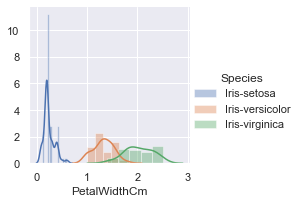

In [41]:
# Distplot
plot = sns.FacetGrid(df, hue='Species')
plot.map(sns.distplot, 'SepalLengthCm').add_legend()

plot = sns.FacetGrid(df, hue='Species')
plot.map(sns.distplot, 'SepalWidthCm').add_legend()

plot = sns.FacetGrid(df, hue ='Species' )
plot.map(sns.distplot, 'PetalLengthCm').add_legend()

plot = sns.FacetGrid(df, hue='Species')
plot.map(sns.distplot, 'PetalWidthCm').add_legend()

plt.show()

In [43]:
data.corr(method='pearson')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.624413,-0.654654,0.969909,0.999685
SepalLengthCm,0.624413,1.000000,-0.999226,0.795795,0.643817
SepalWidthCm,-0.654654,-0.999226,1.000000,-0.818999,-0.673417
PetalLengthCm,0.969909,0.795795,-0.818999,1.000000,0.975713
PetalWidthCm,0.999685,0.643817,-0.673417,0.975713,1.000000


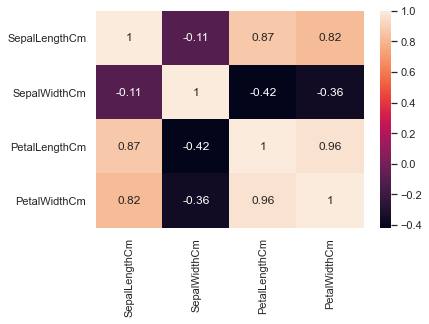

In [44]:
#plot the above correlation in heatmaps

sns.heatmap(df.corr(method='pearson').drop(['Id'],axis=1).drop(['Id'], axis=0), annot=True);

plt.show()

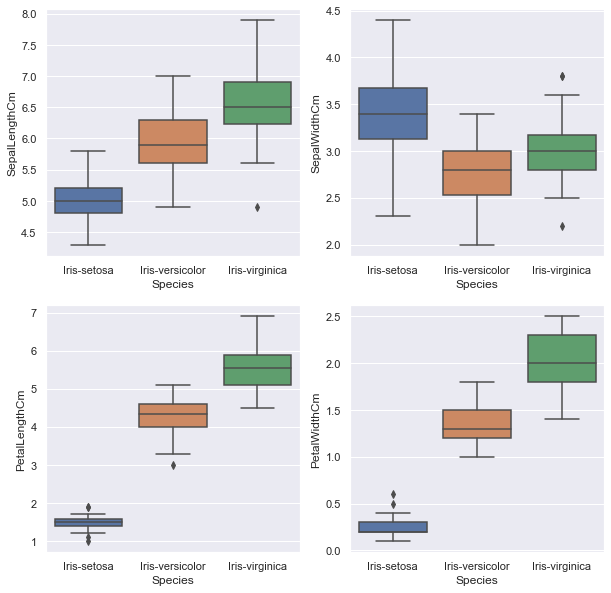

In [50]:
# boxplot to see the outliers
def graph(y):
    sns.boxplot(x='Species',y=y, data=df)
    
plt.figure(figsize =(10,10))

plt.subplot(221)
graph('SepalLengthCm')

plt.subplot(222)
graph('SepalWidthCm')

plt.subplot(223)
graph('PetalLengthCm')

plt.subplot(224)
graph('PetalWidthCm')

plt.show()

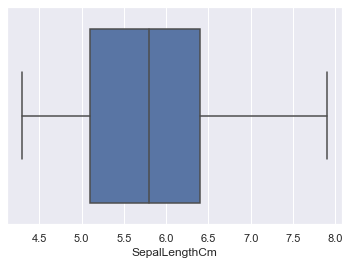

In [59]:
sns.boxplot(x='SepalLengthCm', data=df)

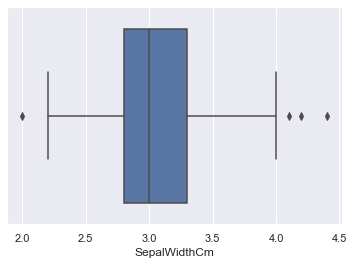

In [58]:
sns.boxplot(x='SepalWidthCm', data=df)

Old Shape: (150, 6)
New Shape: (146, 6)


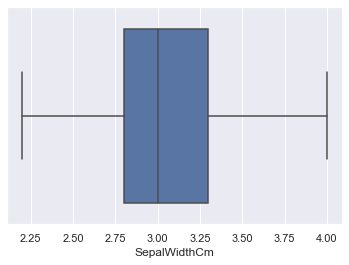

In [63]:
from sklearn.datasets import load_boston

q1 = np.percentile(df['SepalWidthCm'], 25, interpolation = 'midpoint')
q3 = np.percentile(df['SepalWidthCm'], 75, interpolation= 'midpoint')
IQR = q3-q1

print('Old Shape:', df.shape)

upper = np.where(df['SepalWidthCm']>=(q3+1.5*IQR))
lower = np.where(df['SepalWidthCm']<=(q1-1.5*IQR))

df.drop(upper[0],inplace=True)
df.drop(lower[0], inplace=True)

print('New Shape:',df.shape)

sns.boxplot(x='SepalWidthCm', data=df)

In [72]:
data.shape

(146, 6)

### Model

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [74]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [75]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [82]:
encode = LabelEncoder()
data.Species = encode.fit_transform(data.Species)
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [81]:
data['Species'].unique()

array([0, 1, 2])

In [83]:
# Train-test-split
train, test =train_test_split(data , test_size=0.2, random_state=0)

In [84]:
train.shape

(116, 6)

In [85]:
test.shape

(30, 6)

In [86]:
x_train = train.drop(columns=['Species'], axis=1)
y_train = train['Species']

x_test = test.drop(columns = ['Species'], axis=1)
y_test = test['Species']

In [87]:
model = LogisticRegression()
model.fit(x_train,y_train)

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [88]:
predict = model.predict(x_test)

In [89]:
print('Predicted values on Test data', encode.inverse_transform(predict))

Predicted values on Test data [0 0 0 2 2 1 0 0 2 0 0 1 2 1 1 1 0 1 2 0 1 0 2 1 2 0 2 1 1 2]


In [94]:
accuracy = accuracy_score(y_test, predict)
print(f'Accuracy: {round(accuracy*100,2)}%')

Accuracy: 100.0%
